In [95]:
import pandas as pd
import numpy as np
from numpy import log, exp, power, sqrt
import seaborn as sns

In [96]:
#constants

from scipy.constants import R
alpha = 20000 #J/mol
beta = -18000 #J/mol

In [116]:
# import the dataset datasets/mgfe204 into a pandas dataframe with the first column being the index, with no header row
df = pd.read_csv('datasets/mgfe2o4.csv', header=None)

df.head()

,0,1
0,0.899,673
1,0.900,723
2,0.884,773
3,0.882,773
4,0.869,823


<Axes: xlabel='0', ylabel='1'>

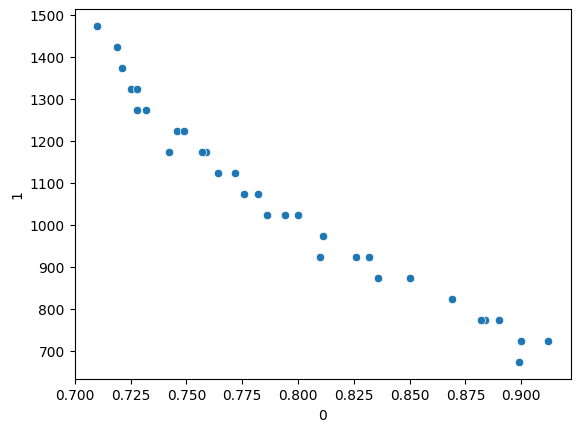

In [117]:
# plot the data with 0 vs 1
sns.scatterplot(x=0, y=1, data=df)

# Graphs

In [98]:
def entropy(x):
    return -R*(  (x * log(x) + (1-x)*log(1-x))  +  2* ((x/2)*log(x/2)+(1-x/2)*log(1-x/2)))

def enthalpy(x):
    return alpha*x + beta*(power(x,2))

def gibbs(x, temp):
    return enthalpy(x) - temp*entropy(x)

In [99]:
# generate a plot of the gibbs free energy of mixing for the mgfe2o4 system across values of x from 0 to 1 for values of temperature from 300 to 1000 K in 100k increments

temperature_range = np.linspace(300,10000,8)
x_range = np.linspace(2/3,1,100)

# generate a pandas dataframe for each temperature value
gibbs_data = pd.DataFrame()
# set the index of the dataframe to the x_range
gibbs_data.index = x_range

for temp in temperature_range:
    gibbs_data[temp] = gibbs(x_range, temp)

gibbs_data.head()

/var/folders/w9/1st560c91jqfvghjv_hd3mcr0000gn/T/ipykernel_2654/3709633946.py:2: RuntimeWarning: divide by zero encountered in log
  return -R*(  (x * log(x) + (1-x)*log(1-x))  +  2* ((x/2)*log(x/2)+(1-x/2)*log(1-x/2)))
/var/folders/w9/1st560c91jqfvghjv_hd3mcr0000gn/T/ipykernel_2654/3709633946.py:2: RuntimeWarning: invalid value encountered in multiply
  return -R*(  (x * log(x) + (1-x)*log(1-x))  +  2* ((x/2)*log(x/2)+(1-x/2)*log(1-x/2)))


,300.000000,1685.714286,3071.428571,4457.142857,5842.857143,7228.571429,8614.285714,10000.000000
0.666667,570.287401,-21430.448572,-43431.184545,-65431.920518,-87432.656491,-109433.392464,-131434.128437,-153434.864410
0.670034,556.710845,-21443.583925,-43443.878695,-65444.173466,-87444.468236,-109444.763006,-131445.057776,-153445.352546
0.673401,542.917536,-21456.052090,-43455.021716,-65453.991343,-87452.960969,-109451.930595,-131450.900221,-153449.869847
0.676768,528.907989,-21467.850171,-43464.608331,-65461.366491,-87458.124651,-109454.882811,-131451.640971,-153448.399131
0.680135,514.682744,-21478.975141,-43472.633027,-65466.290912,-87459.948797,-109453.606682,-131447.264568,-153440.922453


array([<Axes: xlabel='x', ylabel='Gibbs Free Energy (J/mol)'>,
       <Axes: xlabel='x', ylabel='Gibbs Free Energy (J/mol)'>,
       <Axes: xlabel='x', ylabel='Gibbs Free Energy (J/mol)'>,
       <Axes: xlabel='x', ylabel='Gibbs Free Energy (J/mol)'>,
       <Axes: xlabel='x', ylabel='Gibbs Free Energy (J/mol)'>,
       <Axes: xlabel='x', ylabel='Gibbs Free Energy (J/mol)'>,
       <Axes: xlabel='x', ylabel='Gibbs Free Energy (J/mol)'>,
       <Axes: xlabel='x', ylabel='Gibbs Free Energy (J/mol)'>],
      dtype=object)

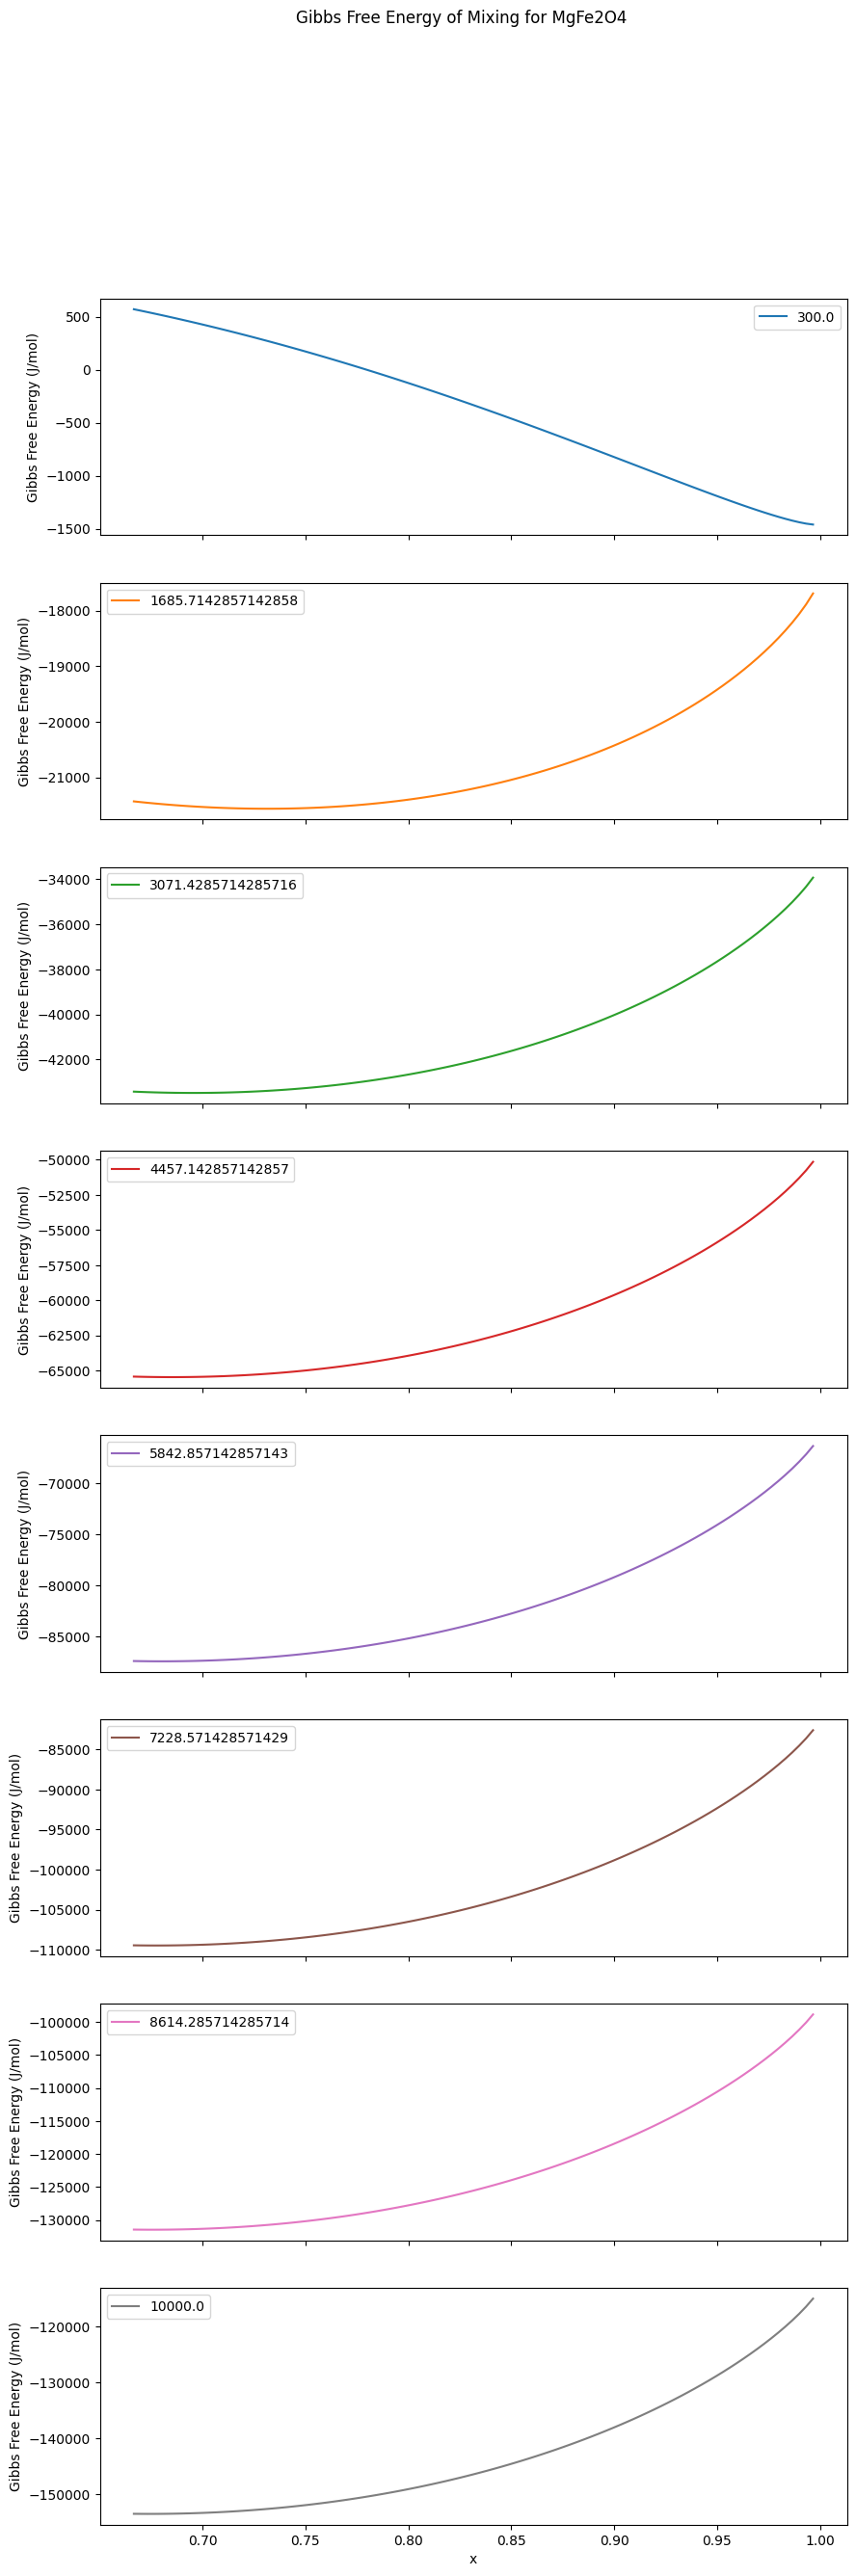

In [105]:
# plot the data, with axis names and a legend on seprate graphs for each temperature value with subplots

gibbs_data.plot(subplots=True, figsize=(10,30), title='Gibbs Free Energy of Mixing for MgFe2O4', xlabel='x', ylabel='Gibbs Free Energy (J/mol)')

In [ ]:
# normalise the data so that x=0 value is 0 for each temperature value
